# Pokemon, Can You Predict Their Types From Stats?
## A Tutorial
### By Joey Moore and Siddharth Karunakaran

Pokemon is a popular franchise that is based around the idea of monsters fighting each other to see who is the best. One of the unique factors of Pokemon are their typings. Each Pokemon has certain affinities for certain elements. In this tutorial, we will break down all Pokemon to see if there is a relationship between the base statistics of a Pokemon and the typing that it has.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model

In [131]:
data = pd.read_csv("Pokemon.csv")
#data.head()
#print(data['Type 1'].value_counts()['Water'])
# boo = True
# for index, row in data.iterrows():
#     if boo:
#         for index in range(4,10):
#             print(row[index])
#     boo = False
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


This dataset is called a Pokedex. It holds the name, entry number, typing(s), base stats, total stats, generation introduced, and legendary status. For the purposes of this tutorial, we can disregard the name, entry number, and generation. They won't play a role in the analysis. 

In [132]:
#Train the Machine Learning model with the sample data
#Create a 2D array of values detailing the average of each stat for each typing
model = pd.DataFrame()
model['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']
stats = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Total_w_sec', 'HP_w_sec', 'Attack_w_sec', 'Defense_w_sec', 'Sp. Atk_w_sec', 'Sp. Def_w_sec', 'Speed_w_sec', 'Total_Num_Primary', 'Total_Num_Secondary']


for column in stats:
    model[column] = 0

num_per_type = data['Type 1'].value_counts()
num_per_type_2 = data['Type 2'].value_counts()

for i in num_per_type.index:
    m = model.loc[model['Type'] == i] 
    model.loc[m.index, 'Total_Num_Primary'] = num_per_type[i]


for i in num_per_type_2.index:
    m = model.loc[model['Type'] == i]
    model.loc[m.index, 'Total_Num_Secondary'] = num_per_type_2[i] + model.loc[m.index, 'Total_Num_Primary']

for index1, typing in model.iterrows():
    for index2, pokemon in data.iterrows():
        if pokemon['Type 1'] == typing['Type']:
            for index in range(4,11):
                model.loc[index1, data.columns[index]] += pokemon[index]
                model.loc[index1, data.columns[index] + '_w_sec'] += pokemon[index]

        if pokemon['Type 2'] and pokemon['Type 2'] == typing['Type']:
            for index in range(4,11):
                model.loc[index1, data.columns[index] + '_w_sec'] += pokemon[index]

    for col_index in range(1,8):
        model.loc[index1, model.columns[col_index]] /= model.loc[index1,'Total_Num_Primary']
        model.loc[index1, model.columns[col_index+7]] /= model.loc[index1,'Total_Num_Secondary']

#normalize values around 1 to account for variability between weak/strong pokemon
    for col_index in range(2,8):
        model.loc[index1, model.columns[col_index]] /= (model.loc[index1,'Total']/6)
        model.loc[index1, model.columns[col_index+7]] /= (model.loc[index1,'Total_w_sec']/6)

model

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_w_sec,HP_w_sec,Attack_w_sec,Defense_w_sec,Sp. Atk_w_sec,Sp. Def_w_sec,Speed_w_sec,Total_Num_Primary,Total_Num_Secondary
0,Grass,421.142857,0.958412,1.043080,1.008684,1.104138,1.003392,0.882293,417.926316,0.948291,1.054681,1.051659,1.047125,1.026572,0.871672,70,95
1,Fire,458.076923,0.915617,1.110327,0.887657,1.165491,0.945844,0.975063,467.109375,0.901154,1.080381,0.900351,1.194581,0.954742,0.968791,52,64
2,Water,430.455357,1.004460,1.033582,1.016780,1.042791,0.982929,0.919458,429.095238,0.993120,1.030629,1.038841,1.045611,0.983132,0.908667,112,126
3,Bug,378.927536,0.900711,1.123767,1.119865,0.852979,1.026008,0.976669,379.527778,0.896948,1.134524,1.124204,0.846886,1.022323,0.975115,69,72
4,Normal,401.683673,1.154274,1.097422,0.893941,0.833736,0.951861,1.068767,402.068627,1.145107,1.084246,0.889517,0.851771,0.951257,1.078101,98,102
5,Poison,399.142857,1.010916,1.122584,1.034538,0.908375,0.967967,0.955619,397.693548,0.944397,1.068013,0.961674,1.024212,1.017155,0.984548,28,62
6,Electric,443.409091,0.809124,0.934905,0.897078,1.218145,0.997335,1.143414,444.840000,0.852441,0.937685,0.897491,1.199892,0.993796,1.118694,44,50
7,Ground,437.500000,1.011857,1.313143,1.163571,0.774429,0.860571,0.876429,441.074627,1.028154,1.260625,1.193016,0.832634,0.881971,0.803600,32,67
8,Fairy,413.176471,1.076310,0.893508,0.954157,1.140376,1.230068,0.705581,415.925000,0.987798,0.888261,1.015568,1.103564,1.199134,0.805674,17,40
9,Fighting,416.444444,1.006403,1.394344,0.949840,0.765208,0.932231,0.951974,470.113208,0.951678,1.335768,0.945176,0.854150,0.936507,0.976722,27,53


Now we have taken the stats for each Pokemon and used it to create a new dataframe that holds the normalized averages of each stata by type, as well as the total number of Pokemon that exist for each type. Since some Pokemon have lower overall stats than others, it is important to normalize the data so we can see if the stats follow a pattern rather than the value of the stats.

<AxesSubplot:>

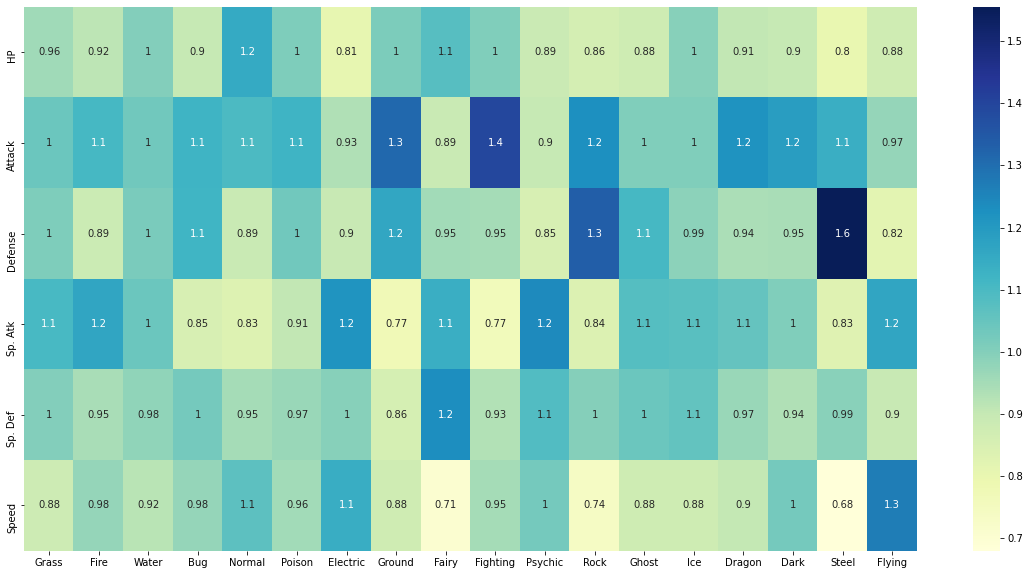

In [133]:
col1 = model['Type']
col2 = model[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
fig, ax = plt.subplots(figsize=(20,10))  
sb.heatmap(col2.transpose(), xticklabels=col1, annot = True, ax = ax, cmap="YlGnBu")

The heat map above shows the relationship of typing to stats. For the most part, it there is nothing too unique, but some types like Rock and Steel have higher defense and Fighting and Ground have higher attack. While these points may play a role in the predictiblilty of typing, there is no garuntee that they aren't the result of outliers. 

<AxesSubplot:xlabel='Type', ylabel='Total'>

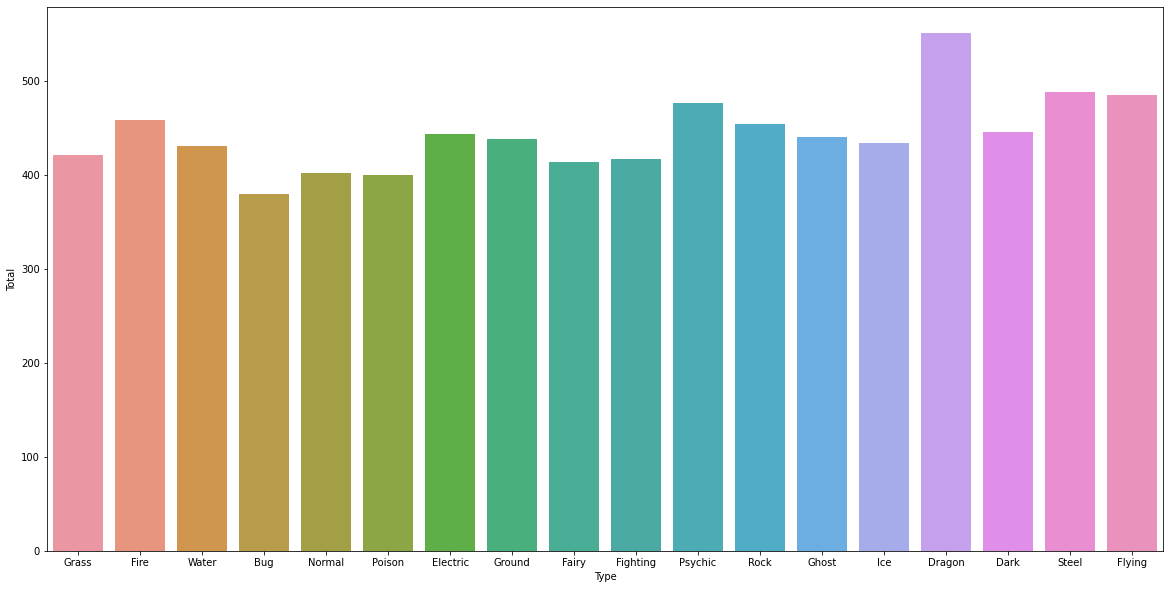

In [134]:
col3 = model['Total']
fig, ax = plt.subplots(figsize=(20,10)) 
sb.barplot(x = col1, y = col3, ax =ax)

We also account for the overall highest of stats based on typings. Dragon types are shown to be the most powerful in overall stats. On the other Bug appears to have the lowest overall stats.

Despite that static nature of the data, it is worth noting that certain Pokemon will always have significatly better stats than others because of their status as Legendary. This could skew the data slightly, so it is worth comparing the the averages of Pokemon that are not Legendary.

In [135]:
nonLegend = pd.DataFrame(data)
nonLegend = nonLegend[nonLegend['Legendary'] == False]
nonLegend

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


In [136]:
model2 = pd.DataFrame()
model2['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']
stats = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total_Num']


for column in stats:
    model2[column] = 0

num_per_type = nonLegend['Type 1'].value_counts()

m = model2.loc[model2['Type'] == 'Water'].index

for i in num_per_type.index:
    m = model2.loc[model2['Type'] == i]
    model2.loc[m.index, 'Total_Num'] = num_per_type[i]


for index1, typing in model2.iterrows():
    for index2, pokemon in nonLegend.iterrows():
        if pokemon['Type 1'] == typing['Type']:
            for index in range(4,11):
                model2.loc[index1, nonLegend.columns[index]] += pokemon[index]
    for col_index in range(1,8):
        model2.loc[index1, model2.columns[col_index]] /= model2.loc[index1,'Total_Num']
#normalize values around 1 to account for variability between weak/strong pokemon
    for col_index in range(2,8):
        model2.loc[index1, model2.columns[col_index]] /= (model2.loc[index1,'Total']/6)



model2

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Num
0,Grass,413.432836,0.956968,1.046643,1.020000,1.107942,1.002022,0.866426,67
1,Fire,442.127660,0.910395,1.115399,0.875746,1.167084,0.936959,0.994418,47
2,Water,421.398148,1.012634,1.036233,1.025027,1.029509,0.970710,0.925886,108
3,Bug,378.927536,0.900711,1.123767,1.119865,0.852979,1.026008,0.976669,69
4,Normal,395.572917,1.160184,1.093351,0.890323,0.832653,0.950362,1.073127,96
5,Poison,399.142857,1.010916,1.122584,1.034538,0.908375,0.967967,0.955619,28
6,Electric,429.750000,0.800349,0.923211,0.913438,1.204538,1.009773,1.148691,40
7,Ground,405.714286,1.047359,1.301408,1.180458,0.706162,0.880986,0.883627,28
8,Fairy,396.500000,1.072509,0.865385,0.966583,1.138714,1.269231,0.687579,16
9,Fighting,416.444444,1.006403,1.394344,0.949840,0.765208,0.932231,0.951974,27


In [137]:
diff = pd.DataFrame()
diff['Type'] = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']
change = model['Total']-model2['Total']
diff['change'] = change
diff

,Type,change
0,Grass,7.710021
1,Fire,15.949264
2,Water,9.057209
3,Bug,0.000000
4,Normal,6.110757
5,Poison,0.000000
6,Electric,13.659091
7,Ground,31.785714
8,Fairy,16.676471
9,Fighting,0.000000


As we can see, some types saw no change, but others saw a dramatic change without Legendaries. 

<AxesSubplot:>

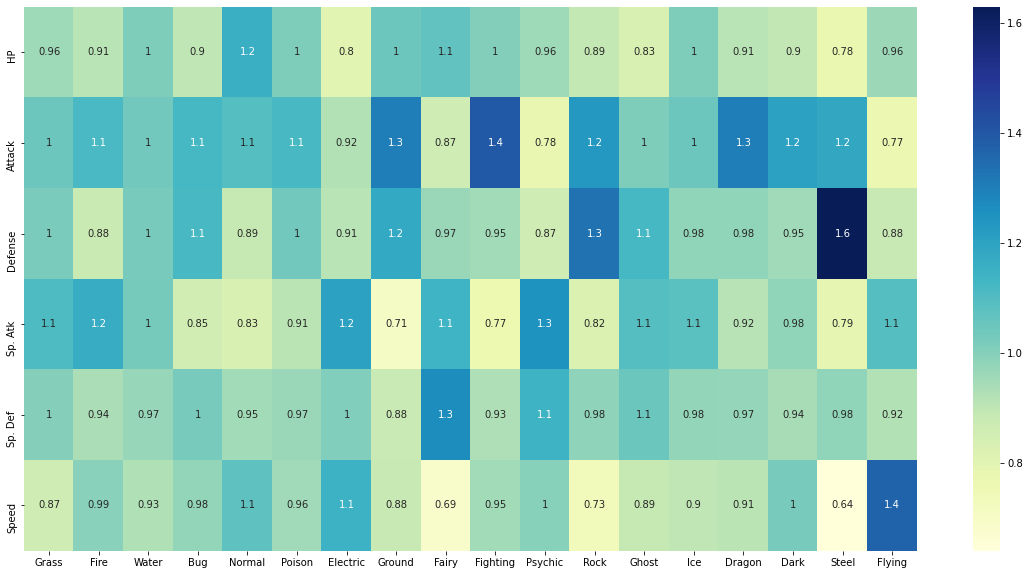

In [138]:
col1 = model2['Type']
col2 = model2[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
fig, ax = plt.subplots(figsize=(20,10))  
sb.heatmap(col2.transpose(), xticklabels=col1, annot = True, ax = ax, cmap="YlGnBu")

<AxesSubplot:xlabel='Type', ylabel='Total'>

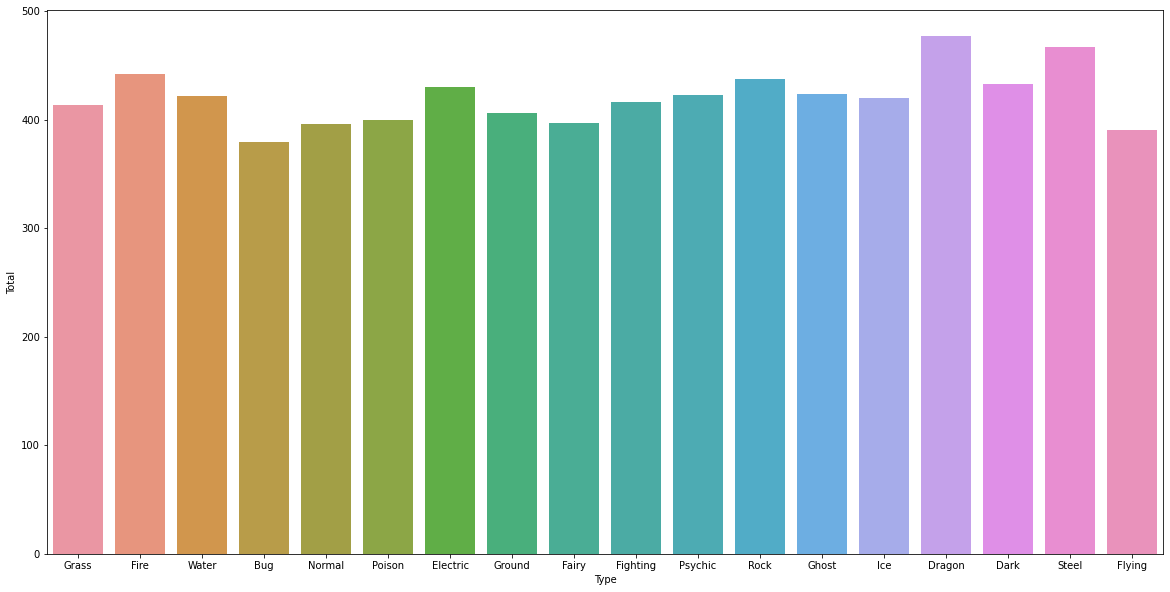

In [139]:
col3 = model2['Total']
fig, ax = plt.subplots(figsize=(20,10)) 
sb.barplot(x = col1, y = col3, ax =ax)

While the total averages saw some changes as a result of removing legendaries, the general shape of the graph hasn't changed. This shows that while legendaries do play a role in the data, it is does not make a large difference in the overall stats of the Pokemon.

In [140]:
#use the predictive model to guess a pokemon's typing based on its stats alone

def predict(pok):
    #normalize the stats around 1
    for col in range (1,7):
        pok[col] = (6*pok[col])/pok[0]
    arr = np.empty(18)
    resid = 0
    for index, Type in model.iterrows():
        for col in range(1,7):
            resid += abs(pok[col]-model.iloc[index, col+1])
        arr[index] = resid + 1/model.loc[index, 'Total_Num_Primary']
        resid = 0
    result_ind = np.where(arr == np.amin(arr))

    return(model.loc[result_ind[0][0], 'Type'])

def predict_w_sec(pok):
    #normalize the stats around 1
    for col in range (1,7):
        pok[col] = (6*pok[col])/pok[0]
    arr = np.empty(18)
    resid = 0
    for index, Type in model.iterrows():
        for col in range(1,7):
            resid += abs(pok[col]-model.iloc[index, col+8])
        arr[index] = resid
        resid = 0
    result_ind = np.where(arr == np.amin(arr))
    return(model.loc[result_ind[0][0], 'Type'])

In [118]:
#Analysis of algorithms
count = 0
count_sec = 0
model['Guessed_Correct'] = 0
model['Guessed_Correct_sec'] = 0
model['Guessed_in_Error'] = 0
model['Guessed_in_Error_sec'] = 0
for index, pok in data.iterrows():
    guess = predict(pok[4:11])
    guess_sec = predict_w_sec(pok[4:11])
    #  or guess == pok[3]:

    if guess == pok[2]:
        count+=1
        model.loc[model['Type'] == guess, 'Guessed_Correct'] += 1
    else:
        model.loc[model['Type'] == guess, 'Guessed_in_Error'] +=1
    if guess_sec == pok[2]:
        count_sec+=1
        model.loc[model['Type'] == guess_sec, 'Guessed_Correct_sec'] += 1
    else:
        model.loc[model['Type'] == guess_sec, 'Guessed_in_Error_sec'] +=1

print(count,count_sec)
print(model.loc[model['Type']=='Steel'])

127 57
     Type       Total      HP    Attack   Defense  Sp. Atk  Sp. Def    Speed  \
16  Steel  487.703704  0.8024  1.140492  1.554678  0.83065  0.99195  0.67983   

    Total_w_sec  HP_w_sec  ...  Defense_w_sec  Sp. Atk_w_sec  Sp. Def_w_sec  \
16   486.591837   0.80099  ...       1.437906       0.889066       1.025458   

    Speed_w_sec  Total_Num_Primary  Total_Num_Secondary  Guessed_Correct  \
16     0.704106                 27                   49               16   

    Guessed_Correct_sec  Guessed_in_Error  Guessed_in_Error_sec  
16                    0                66                     0  

[1 rows x 21 columns]


In [120]:
print((model['Guessed_in_Error'].idxmax()))
print(model.loc[6])
model

6
Type                      Electric
Total                   443.409091
HP                        0.809124
Attack                    0.934905
Defense                   0.897078
Sp. Atk                   1.218145
Sp. Def                   0.997335
Speed                     1.143414
Total_w_sec                 444.84
HP_w_sec                  0.852441
Attack_w_sec              0.937685
Defense_w_sec             0.897491
Sp. Atk_w_sec             1.199892
Sp. Def_w_sec             0.993796
Speed_w_sec               1.118694
Total_Num_Primary               44
Total_Num_Secondary             50
Guessed_Correct                 10
Guessed_Correct_sec              3
Guessed_in_Error                71
Guessed_in_Error_sec            33
Name: 6, dtype: object


,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_w_sec,HP_w_sec,...,Defense_w_sec,Sp. Atk_w_sec,Sp. Def_w_sec,Speed_w_sec,Total_Num_Primary,Total_Num_Secondary,Guessed_Correct,Guessed_Correct_sec,Guessed_in_Error,Guessed_in_Error_sec
0,Grass,421.142857,0.958412,1.043080,1.008684,1.104138,1.003392,0.882293,417.926316,0.948291,...,1.051659,1.047125,1.026572,0.871672,70,95,3,21,7,194
1,Fire,458.076923,0.915617,1.110327,0.887657,1.165491,0.945844,0.975063,467.109375,0.901154,...,0.900351,1.194581,0.954742,0.968791,52,64,12,8,49,72
2,Water,430.455357,1.004460,1.033582,1.016780,1.042791,0.982929,0.919458,429.095238,0.993120,...,1.038841,1.045611,0.983132,0.908667,112,126,6,5,20,40
3,Bug,378.927536,0.900711,1.123767,1.119865,0.852979,1.026008,0.976669,379.527778,0.896948,...,1.124204,0.846886,1.022323,0.975115,69,72,4,1,29,0
4,Normal,401.683673,1.154274,1.097422,0.893941,0.833736,0.951861,1.068767,402.068627,1.145107,...,0.889517,0.851771,0.951257,1.078101,98,102,26,8,31,38
5,Poison,399.142857,1.010916,1.122584,1.034538,0.908375,0.967967,0.955619,397.693548,0.944397,...,0.961674,1.024212,1.017155,0.984548,28,62,4,1,11,20
6,Electric,443.409091,0.809124,0.934905,0.897078,1.218145,0.997335,1.143414,444.840000,0.852441,...,0.897491,1.199892,0.993796,1.118694,44,50,10,3,71,33
7,Ground,437.500000,1.011857,1.313143,1.163571,0.774429,0.860571,0.876429,441.074627,1.028154,...,1.193016,0.832634,0.881971,0.803600,32,67,9,4,37,25
8,Fairy,413.176471,1.076310,0.893508,0.954157,1.140376,1.230068,0.705581,415.925000,0.987798,...,1.015568,1.103564,1.199134,0.805674,17,40,7,3,71,272
9,Fighting,416.444444,1.006403,1.394344,0.949840,0.765208,0.932231,0.951974,470.113208,0.951678,...,0.945176,0.854150,0.936507,0.976722,27,53,12,1,71,12
